In [6]:
import pandas as pd
import sys
import numpy as np
import string 
sys.path.insert(0, "../")

from feature_variation.PartialDependence import FEATURES

In [7]:
## Add arial unicode MS fotn to matplotlib

In [8]:
from matplotlib import font_manager

font_dirs = ['./']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [19]:
unit_dict = {
    "Age": "years",
    "Sex": "binary (0 - male, 1- female)",
    "HGB": "mmol/l",
    "RBC": "Tpt/l",
    "WBC": "Gpt/l",
    "MCV": "fl",
    "PLT": "Gpt/l",
}

phys_area = {
    "HGB": (7.14, 11.05),
    "RBC": (4.1, 5.9),
    "WBC": (3.7, 11.5),
    "MCV": (80, 96),
    "PLT": (137, 443), 
}

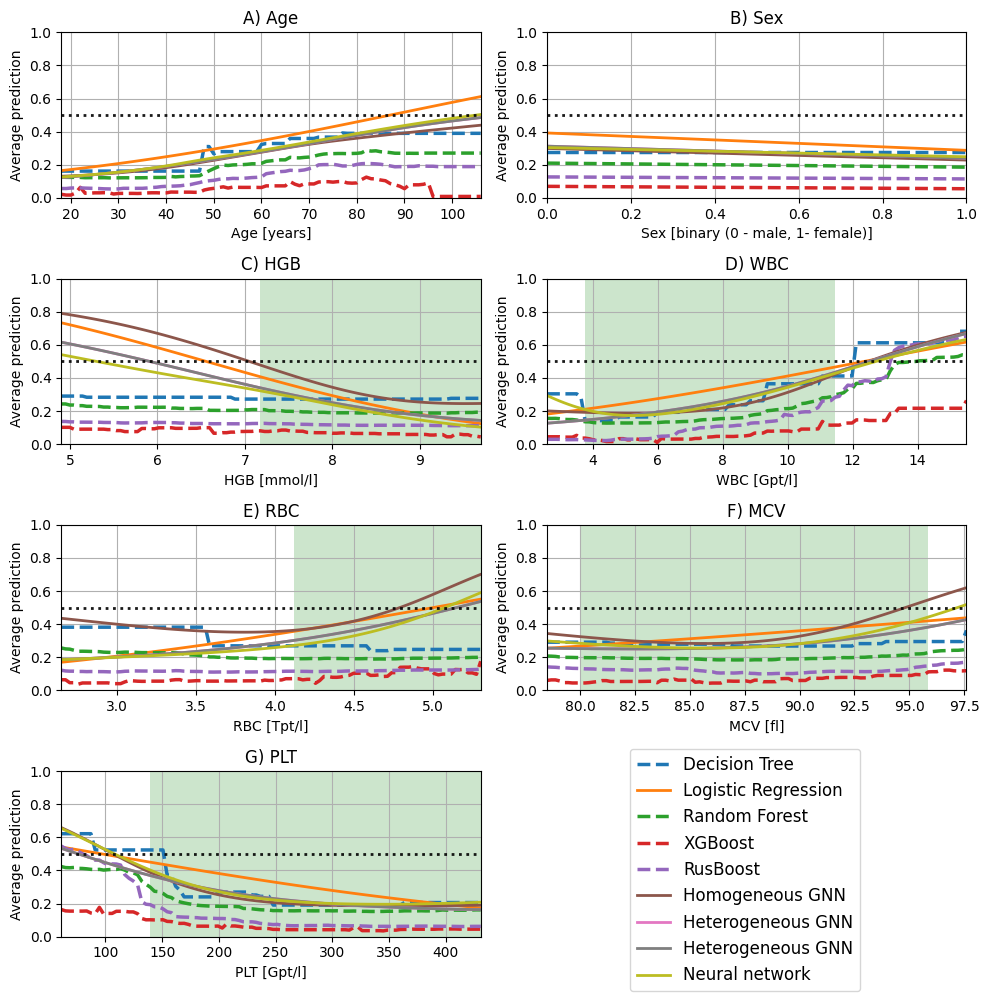

In [68]:
import matplotlib.pyplot as plt 
import matplotlib.transforms as mtransforms

fig, axes = plt.subplots(4, 2, figsize=(10, 10))  # figsize is optional, it sets the figure size

for i, feature in enumerate(FEATURES):
    dt_feature = pd.read_csv(f"../machine_learning/DecisionTreeClassifier_partial_dependence/{feature}.csv")
    lr_feature = pd.read_csv(f"../machine_learning/LogisticRegression_partial_dependence/{feature}.csv")
    rf_feature = pd.read_csv(f"../machine_learning/RandomForestClassifier_partial_dependence/{feature}.csv")
    xgb_feature = pd.read_csv(f"../machine_learning/XGBClassifier_partial_dependence/{feature}.csv")
    rus_feature = pd.read_csv(f"../machine_learning/RUSBoostClassifier_partial_dependence/{feature}.csv")
    hom_gnn_feature = pd.read_csv(f"../graph_learning/homogeneous/Homogeneous GNN_partial_dependence/{feature}.csv")
    het_gnn_feature = pd.read_csv(f"../graph_learning/heterogeneous/Heterogeneous_GNN_partial_dependence/{feature}.csv")
    neural_network_feature = pd.read_csv(f"../neural_network/Neural_Network_partial_dependence/{feature}.csv")
    # feature_list = [dt_feature, lr_feature, rf_feature, xgb_feature, rus_feature, hom_gnn_feature, het_gnn_feature]

    lw_tree_based = 2.5
    # plt.subplot(4, 2, i+1)
    ax = axes[i//2, i % 2]
    ax.plot(dt_feature["grid_values"], dt_feature["average_pred"], label = "Decision Tree", linestyle='--', linewidth=lw_tree_based)    
    ax.plot(lr_feature["grid_values"], lr_feature["average_pred"], label = "Logistic Regression", linestyle="solid", linewidth=2)
    ax.plot(rf_feature["grid_values"], rf_feature["average_pred"], label = "Random Forest",linestyle='--', linewidth=lw_tree_based)
    ax.plot(xgb_feature["grid_values"], xgb_feature["average_pred"], label = "XGBoost",linestyle='--', linewidth=lw_tree_based)
    ax.plot(rus_feature["grid_values"], rus_feature["average_pred"], label = "RusBoost",linestyle='--', linewidth=lw_tree_based)
    ax.plot(hom_gnn_feature["grid_values"], hom_gnn_feature["average_pred"], label = "Homogeneous GNN", linestyle="solid", linewidth=2)
    ax.plot(het_gnn_feature["grid_values"], het_gnn_feature["average_pred"], label = "Heterogeneous GNN", linestyle="solid", linewidth=2)
    ax.plot(het_gnn_feature["grid_values"], het_gnn_feature["average_pred"], label = "Heterogeneous GNN", linestyle="solid", linewidth=2)
    ax.plot(neural_network_feature["grid_values"], neural_network_feature["average_pred"], label = "Neural network", linestyle="solid", linewidth=2)
    ax.grid(which="both")
    ax.set_xlabel(f"{feature} [{unit_dict[feature]}]")
    ax.set_ylabel("Average prediction")
    ax.set_ylim([0, 1])
    ax.set_xlim([dt_feature["grid_values"].min(), dt_feature["grid_values"].max()])
    ax.set_title(f"{string.ascii_uppercase[i]}) {feature}")
    ax.axhline(.5, color='black', lw=2, alpha=0.9, linestyle="dotted")
    if feature not in phys_area: continue
    trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    ax.fill_between(lr_feature["grid_values"], 0, 1, where=(np.logical_and(lr_feature["grid_values"] > phys_area[feature][0], lr_feature["grid_values"] < phys_area[feature][1]) ),
                facecolor='green', alpha=0.2, transform=trans)
handles, labels = axes[0, 0].get_legend_handles_labels()
axes[3, 1].axis('off')
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.0, 0.5, 0.25), fontsize=12)
plt.tight_layout()
fig.savefig('partial_dependence.png', dpi=300, bbox_inches='tight')

../machine_learning/DecisionTreeClassifier_partial_dependence


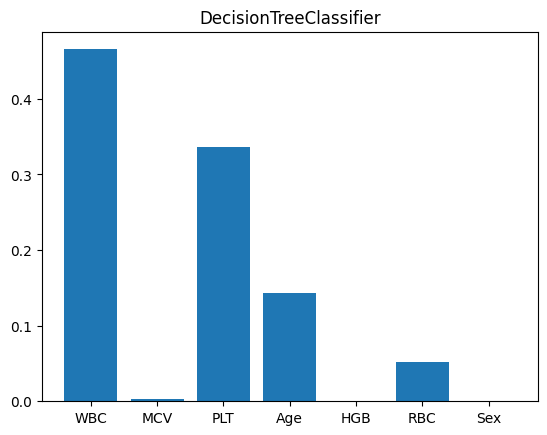

../machine_learning/LogisticRegression_partial_dependence


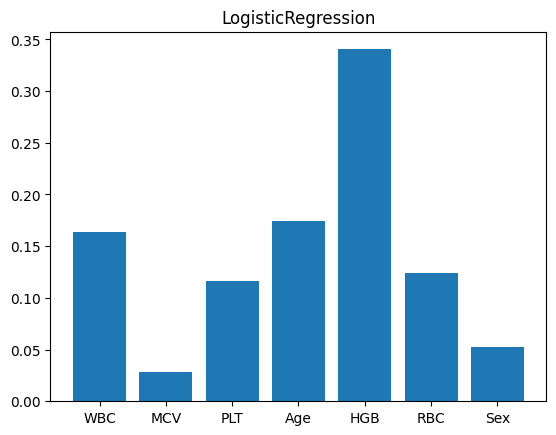

../machine_learning/RandomForestClassifier_partial_dependence


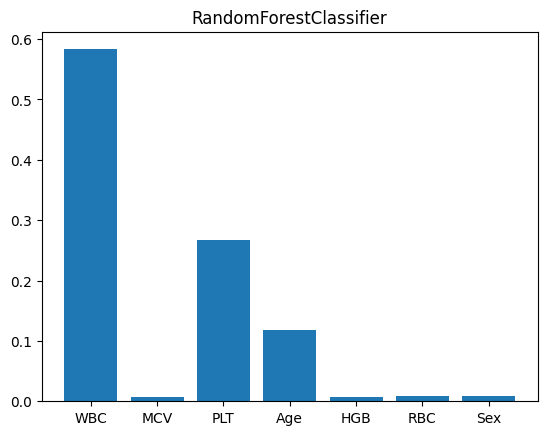

../machine_learning/XGBClassifier_partial_dependence


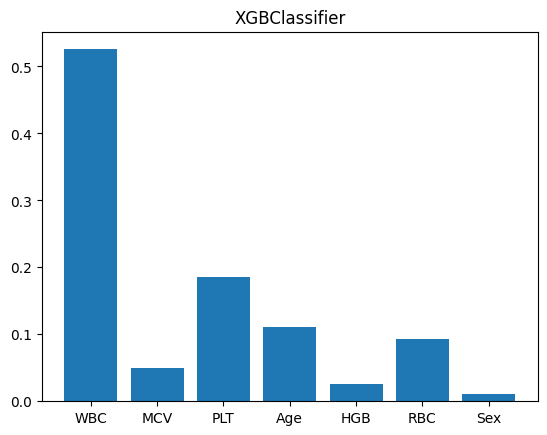

../machine_learning/RUSBoostClassifier_partial_dependence


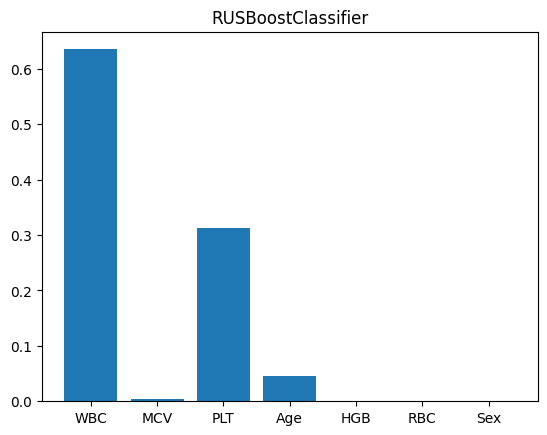

../graph_learning/homogeneous/Homogeneous GNN_partial_dependence


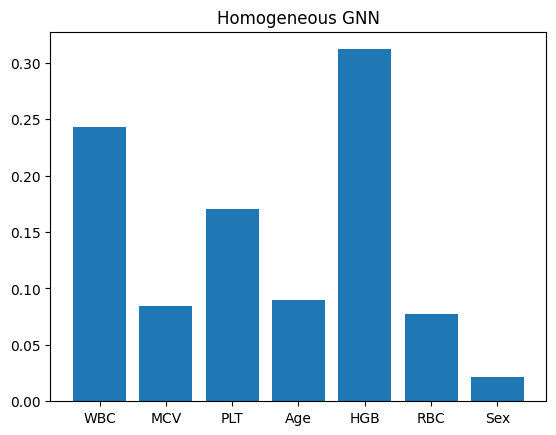

../graph_learning/heterogeneous/Heterogeneous_GNN_partial_dependence


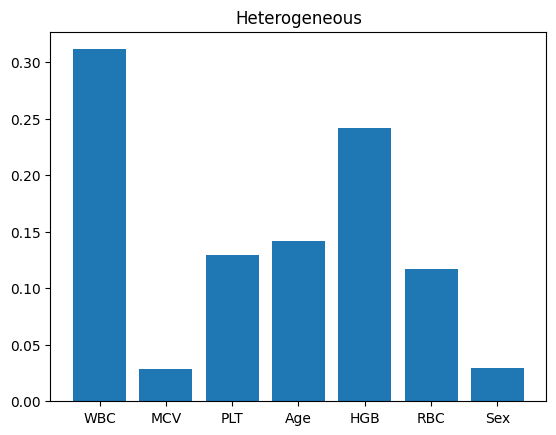

../neural_network/Neural_Network_partial_dependence


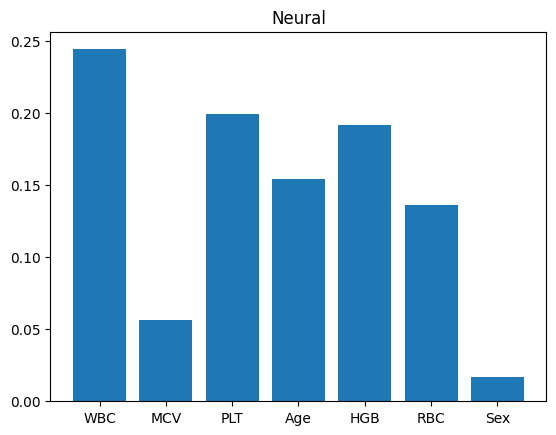

In [23]:
import os
import numpy as np

folder_names = ["../machine_learning/DecisionTreeClassifier_partial_dependence", "../machine_learning/LogisticRegression_partial_dependence",
               "../machine_learning/RandomForestClassifier_partial_dependence", "../machine_learning/XGBClassifier_partial_dependence",
               "../machine_learning/RUSBoostClassifier_partial_dependence", "../graph_learning/homogeneous/Homogeneous GNN_partial_dependence",
               "../graph_learning/heterogeneous/Heterogeneous_GNN_partial_dependence", "../neural_network/Neural_Network_partial_dependence"]
variation_dict = dict()
for folder_name in folder_names:
    
    print(folder_name)
    variances = np.zeros(len(FEATURES))
    files = []
    i = 0
    for file in os.listdir(folder_name):
        if os.path.isdir(file): continue
        feature_df = pd.read_csv(os.path.join(folder_name, file))
        variances[i] = feature_df["average_pred"].var()
        files.append(file[:-4])
        i+=1
    normed_var = variances / variances.sum()
    plt.bar(files, normed_var)
    clf_name = folder_name.split("/")[-1].split("_")[0]
    plt.title(clf_name)
    plt.show()
    variation_dict[clf_name] = normed_var

In [24]:
df = pd.DataFrame.from_dict(variation_dict)
df.index = files
df.sum(0)

DecisionTreeClassifier    1.0
LogisticRegression        1.0
RandomForestClassifier    1.0
XGBClassifier             1.0
RUSBoostClassifier        1.0
Homogeneous GNN           1.0
Heterogeneous             1.0
Neural                    1.0
dtype: float64

In [26]:
{key: key for key in df.columns}

{'DecisionTreeClassifier': 'DecisionTreeClassifier',
 'LogisticRegression': 'LogisticRegression',
 'RandomForestClassifier': 'RandomForestClassifier',
 'XGBClassifier': 'XGBClassifier',
 'RUSBoostClassifier': 'RUSBoostClassifier',
 'Homogeneous GNN': 'Homogeneous GNN',
 'Heterogeneous': 'Heterogeneous',
 'Neural': 'Neural'}

In [48]:
df = df.rename(columns={'DecisionTreeClassifier': 'Decision Tree',
 'LogisticRegression': 'Logistic Regression',
 'RandomForestClassifier': 'Random Forest',
 'XGBClassifier': 'XGBoost',
 'RUSBoostClassifier': 'RUSBoost',
 'Homogeneous GNN': 'Homogeneous GNN',
 'Heterogeneous': 'Heterogeneous GNN',
 'Neural': 'Neural Network'}
)

In [49]:
for key in variation_dict:
    print(variation_dict[key].sum())

1.0
1.0
1.0000000000000002
0.9999999999999999
1.0000000000000002
1.0
0.9999999999999999
1.0000000000000002


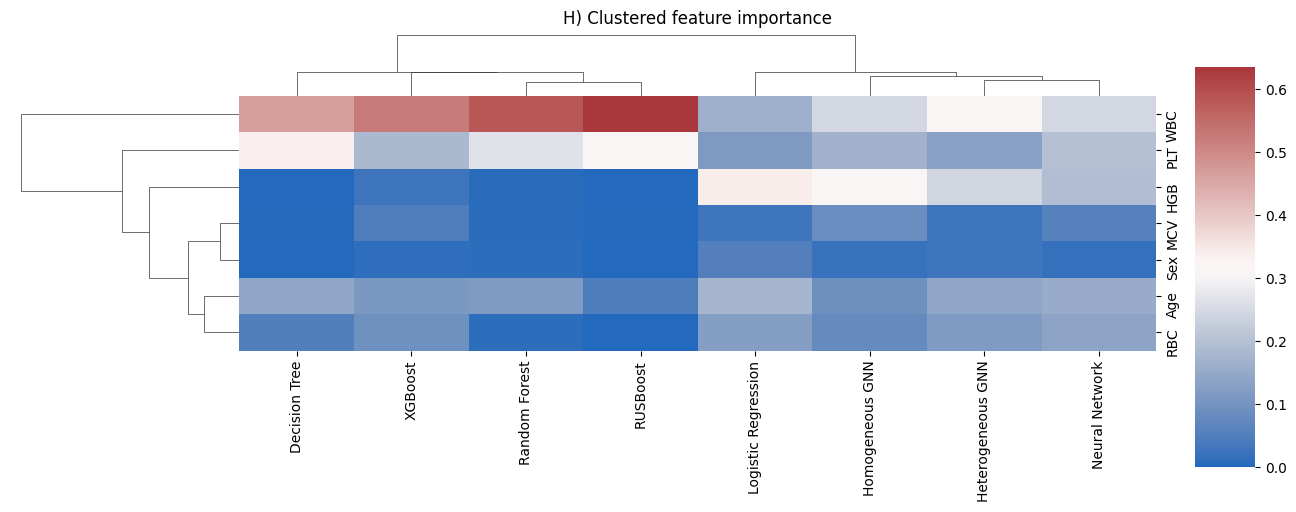

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create clustered heatmap
g = sns.clustermap(df, cmap='vlag', figsize=(12, 5), row_cluster=True, cbar_pos = (1, 0.1, .05, .8))

g.ax_col_dendrogram.set_title("H) Clustered feature importance")
plt.show()
g.fig.savefig('clustered_heatmap.png', dpi=300, bbox_inches='tight')